<a href="https://colab.research.google.com/github/Saksham-Gupta-off/WiDS_EmoSense/blob/master/Week_1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re

In [3]:
data = pd.read_csv("/content/drive/MyDrive/WiDS2023/twitter_data.csv", error_bad_lines=False)

<ipython-input-3-32721436998e>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv("/content/drive/MyDrive/WiDS2023/twitter_data.csv", error_bad_lines=False)
Skipping line 8836: expected 4 fields, saw 5

Skipping line 535882: expected 4 fields, saw 7



In [4]:
data.head()

,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...


In [5]:
def preprocess_text(text):

    # Punctuations
    text = re.sub(r'[.,!$(){}*%@]', '', text)

    # URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Lowercasing
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]

    return ' '.join(lemmatized_tokens)

In [6]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Drop unnecessary columns (ID, Source)
columns_to_drop = ['ItemID', 'SentimentSource']
try:
    data.drop(columns=columns_to_drop, inplace=True)
except:
    print("Columns Already Dropped")

# Apply text preprocessing to the 'Text' column
data['SentimentText'] = data['SentimentText'].apply(preprocess_text)

# Display the preprocessed DataFrame
data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,Sentiment,SentimentText
0,0,sad apl friend
1,0,miss new moon trailer
2,1,omg alreadi 7:30 :
3,0,omgaga im sooo im gunna cri 've dentist sinc 1...
4,0,think mi bf cheat t_t


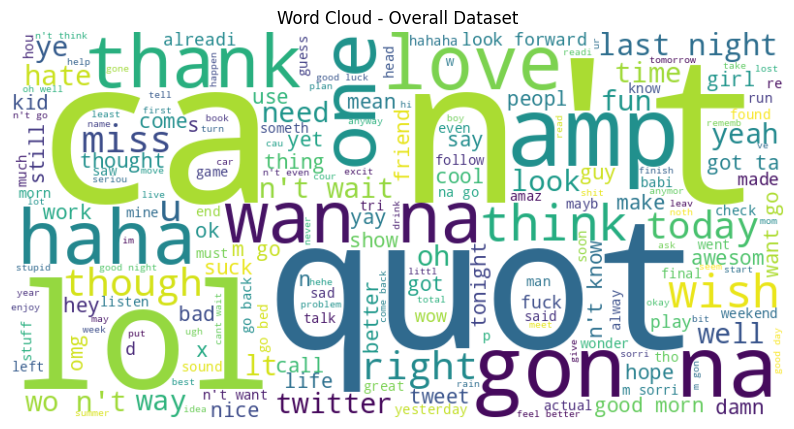

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text data into a single string
all_text = ' '.join(data['SentimentText'].tolist())

# Generate word cloud for overall dataset
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Overall Dataset')
plt.show()

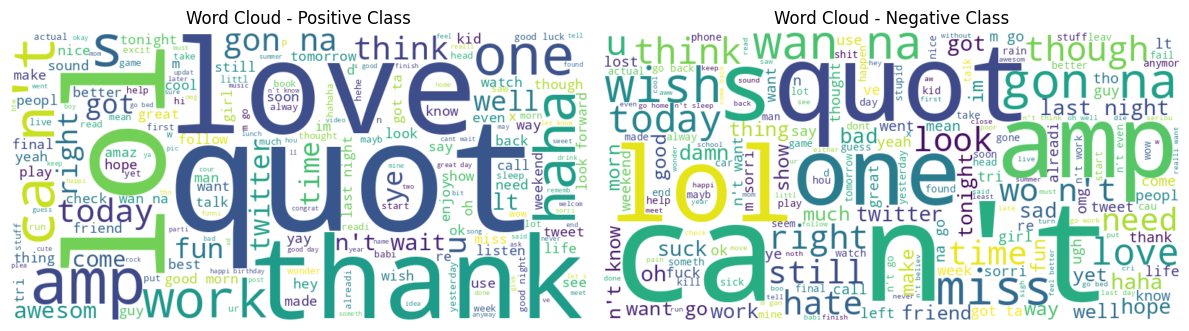

In [8]:
# Separate data for positive and negative classes
positive_text = ' '.join(data[data['Sentiment'] == 1]['SentimentText'].tolist())
negative_text = ' '.join(data[data['Sentiment'] == 0]['SentimentText'].tolist())

# Generate word cloud for positive class
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Generate word cloud for negative class
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display the word clouds for positive and negative classes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(wordcloud_positive, interpolation='bilinear')
axes[0].set_title('Word Cloud - Positive Class')
axes[0].axis('off')

axes[1].imshow(wordcloud_negative, interpolation='bilinear')
axes[1].set_title('Word Cloud - Negative Class')
axes[1].axis('off')

plt.tight_layout()
plt.show()

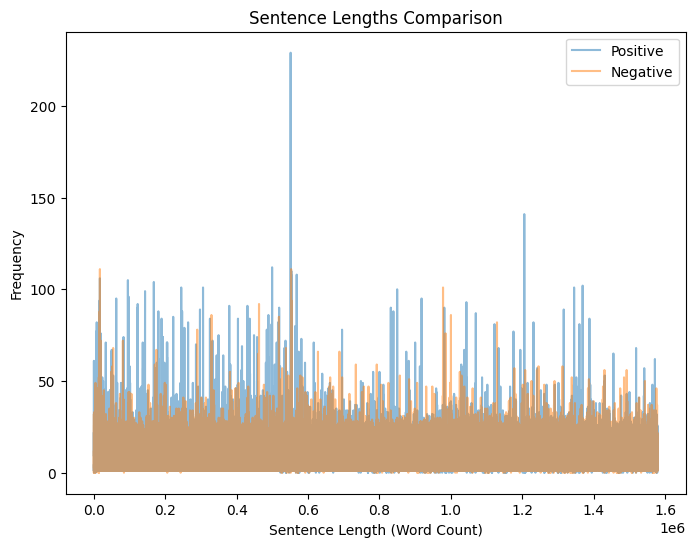

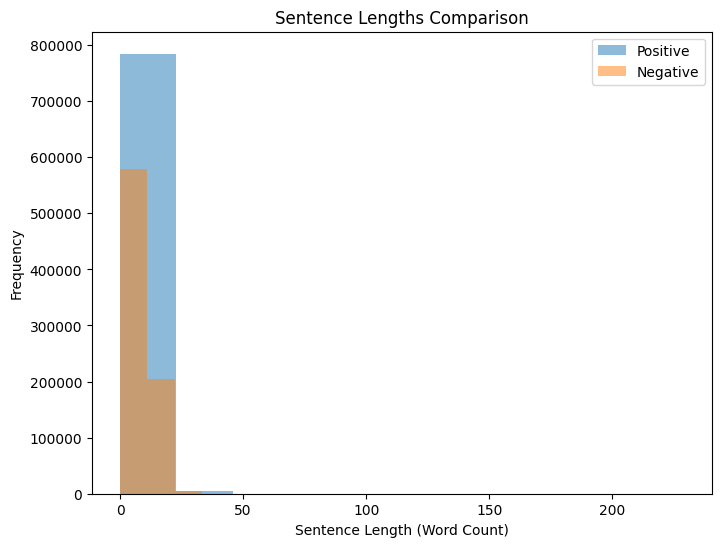

In [9]:
# Calculate sentence lengths (word count) for both classes
data_copy = data
data_copy['Sentence_Length'] = data_copy['SentimentText'].apply(lambda x: len(x.split()))

# Create plots to compare sentence lengths between classes
plt.figure(figsize=(8, 6))
plt.plot(data_copy[data_copy['Sentiment'] == 1]['Sentence_Length'], alpha=0.5, label='Positive')
plt.plot(data_copy[data_copy['Sentiment'] == 0]['Sentence_Length'], alpha=0.5, label='Negative')
plt.title('Sentence Lengths Comparison')
plt.xlabel('Sentence Length (Word Count)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Create plots to compare sentence lengths between classes
plt.figure(figsize=(8, 6))
plt.hist(data_copy[data_copy['Sentiment'] == 1]['Sentence_Length'], alpha=0.5, label='Positive')
plt.hist(data_copy[data_copy['Sentiment'] == 0]['Sentence_Length'], alpha=0.5, label='Negative')
plt.title('Sentence Lengths Comparison')
plt.xlabel('Sentence Length (Word Count)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


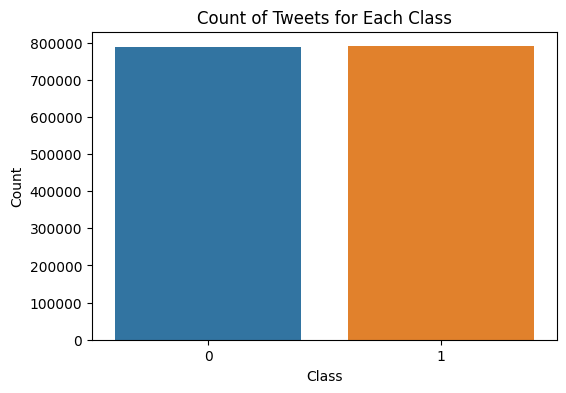

1    790177
0    788435
Name: Sentiment, dtype: int64


In [11]:
# Count tweets for both classes
tweet_counts = data['Sentiment'].value_counts()

# Create a count plot
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Sentiment')
plt.title('Count of Tweets for Each Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Print count of tweets for each class
print(tweet_counts)

In [12]:
# Find the longest tweet for both classes
longest_positive_tweet = data_copy[data_copy['Sentiment'] == 1]['SentimentText'].iloc[data_copy[data_copy['Sentiment'] == 1]['Sentence_Length'].idxmax()]
longest_negative_tweet = data_copy[data_copy['Sentiment'] == 0]['SentimentText'].iloc[data_copy[data_copy['Sentiment'] == 0]['Sentence_Length'].idxmax()]

# Print the longest tweet for both classes
print("Longest Positive Tweet:\n", longest_positive_tweet)
print("\nLongest Negative Tweet:\n", longest_negative_tweet)

Longest Positive Tweet:
 marley & amp ; sad movi well atleast end see

Longest Negative Tweet:
 alvihalderman cant log moment
